<a href="https://colab.research.google.com/github/Raviteja654321/CVIT_Workshop/blob/main/Day_3/Session_2/Day_3_Medical_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Windowing

In [ ]:
import pydicom as dicom
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2

dataset = []

for f in sorted(glob.glob("/content/drive/MyDrive/Med_Imag/data/windowing/Lung-CT-Series/*")):
    x = dicom.dcmread(f)
    dataset.append(x)

# print(dataset)

In [ ]:
dataset = sorted(dataset, key=lambda d: d.ImagePositionPatient[2])  # sorted by last attribute as that was the one that was changing the most

# obtain the pixel spacing from the dataset
PixelSpacing = dataset[0].PixelSpacing
row_spacing = PixelSpacing[0]
column_spacing = PixelSpacing[1]

# obtain the slice thickness from the dataset
SliceThickness = dataset[0].SliceThickness

# calculate the axial aspect ratio based on the values you found above: aspect = (column spacing / row spacing)
ax_aspect = column_spacing / row_spacing

shape = list(dataset[0].pixel_array.shape)
shape.append(len(dataset))
img_3D = np.zeros(shape)

for i, s in enumerate(dataset):
    img_3D[:, :, i] = s.pixel_array


### Perform windowing for lungs, mediastinum and bones
 - Find out what window levels are required for viewing each of the above optimally
 - Note down your observations in the observation cell provided, in it describe what all can you see in each of the 3 views and how it differs from the normal image without windowing

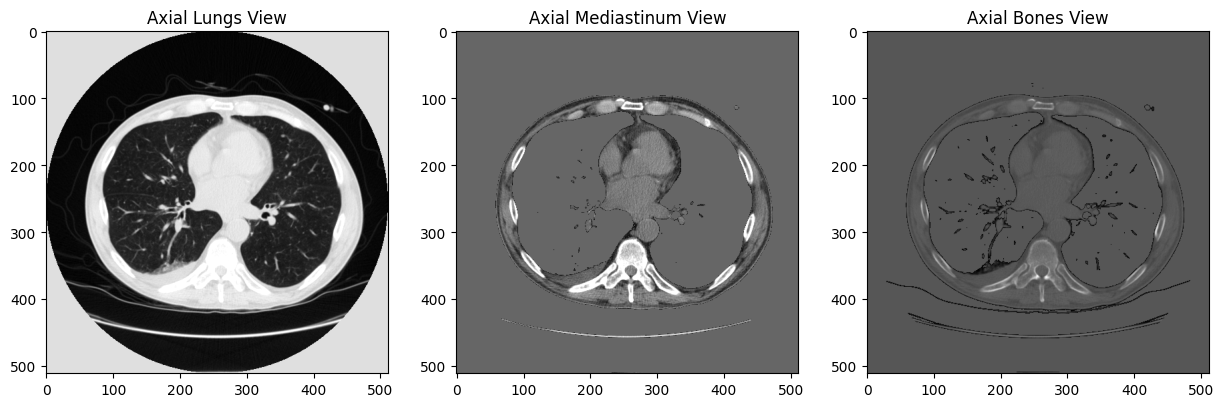

In [ ]:
# # In the following code, fill in the window level and window width values which will allow you to optimally view the lungs, mediastinum and bones respectively

# fig, ax = plt.subplots(1,3, figsize=(15,15))

# # lungs
# # set window parameters
# window_level = 
# window_width = 
# # calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# # and the min visible pixel is half a window width less than window level
# max_visible_pixel = 
# min_visible_pixel =
# # windowed 3D image 
# windowed = img_3D
# # set all pixels less than min visible pixel to 0 in the variable windowed
# # Hint: np.where
# windowed = 
# # set all pixels greater than max visible pixel to 255 in the variable windowed
# windowed = 
# # perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255 
# # Hint: np.interp
# windowed = 

# # plot the windowed image, you don't need to change anything here
# a1 = plt.subplot(1,3,1)
# plt.title("Axial Lungs View")
# plt.imshow(windowed[:, :, windowed.shape[2]//2], cmap="gray")
# a1.set_aspect(ax_aspect)

# # mediastinum
# # set window parameters
# window_level = 
# window_width = 
# # calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# # and the min visible pixel is half a window width less than window level
# max_visible_pixel = 
# min_visible_pixel =
# # windowed 3D image 
# windowed = img_3D
# # set all pixels less than min visible pixel to 0 in the variable windowed
# # Hint: np.where
# windowed = 
# # set all pixels greater than max visible pixel to 255 in the variable windowed
# windowed = 
# # perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255 
# # Hint: np.interp
# windowed = 

# # plot the windowed image, you don't need to change anything here
# a2 = plt.subplot(1,3,2)
# plt.title("Axial Mediastinum View")
# plt.imshow(windowed[:, :, windowed.shape[2]//2], cmap="gray")
# a2.set_aspect(ax_aspect)

# # bones
# window_level = 400
# # set window parameters
# window_level = 
# window_width = 
# # calculate max and min visible pixel values such that the max visible pixel is half a window width more than window level
# # and the min visible pixel is half a window width less than window level
# max_visible_pixel = 
# min_visible_pixel =
# # windowed 3D image 
# windowed = img_3D
# # set all pixels less than min visible pixel to 0 in the variable windowed
# # Hint: np.where
# windowed = 
# # set all pixels greater than max visible pixel to 255 in the variable windowed
# windowed = 
# # perform contrast stretching on the windowed image using interpolation such that the min visible pixel is mapped to 0 and the max visible pixel is mapped to 255 
# # Hint: np.interp
# windowed = 

# # plot the windowed image, you don't need to change anything here
# a3 = plt.subplot(1,3,3)
# plt.title("Axial Bones View")
# plt.imshow(windowed[:, :, windowed.shape[2]//2], cmap="gray")
# a3.set_aspect(ax_aspect)

# plt.show()
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

# lungs
window_level = -600
window_width = 1500
max_visible_pixel = window_level + window_width / 2
min_visible_pixel = window_level - window_width / 2
windowed = img_3D.copy()
windowed = np.where(windowed < min_visible_pixel, 0, windowed)
windowed = np.where(windowed > max_visible_pixel, 255, windowed)
windowed = np.interp(windowed, (min_visible_pixel, max_visible_pixel), (0, 255))

a1 = plt.subplot(1, 3, 1)
plt.title("Axial Lungs View")
plt.imshow(windowed[:, :, windowed.shape[2] // 2], cmap="gray")
a1.set_aspect(ax_aspect)

# mediastinum
window_level = 40
window_width = 400
max_visible_pixel = window_level + window_width / 2
min_visible_pixel = window_level - window_width / 2
windowed = img_3D.copy()
windowed = np.where(windowed < min_visible_pixel, 0, windowed)
windowed = np.where(windowed > max_visible_pixel, 255, windowed)
windowed = np.interp(windowed, (min_visible_pixel, max_visible_pixel), (0, 255))

a2 = plt.subplot(1, 3, 2)
plt.title("Axial Mediastinum View")
plt.imshow(windowed[:, :, windowed.shape[2] // 2], cmap="gray")
a2.set_aspect(ax_aspect)

# bones
window_level = 400
window_width = 2000
max_visible_pixel = window_level + window_width / 2
min_visible_pixel = window_level - window_width / 2
windowed = img_3D.copy()
windowed = np.where(windowed < min_visible_pixel, 0, windowed)
windowed = np.where(windowed > max_visible_pixel, 255, windowed)
windowed = np.interp(windowed, (min_visible_pixel, max_visible_pixel), (0, 255))

a3 = plt.subplot(1, 3, 3)
plt.title("Axial Bones View")
plt.imshow(windowed[:, :, windowed.shape[2] // 2], cmap="gray")
a3.set_aspect(ax_aspect)

plt.show()


#### Observations
 - Note down your observations here, double click to edit

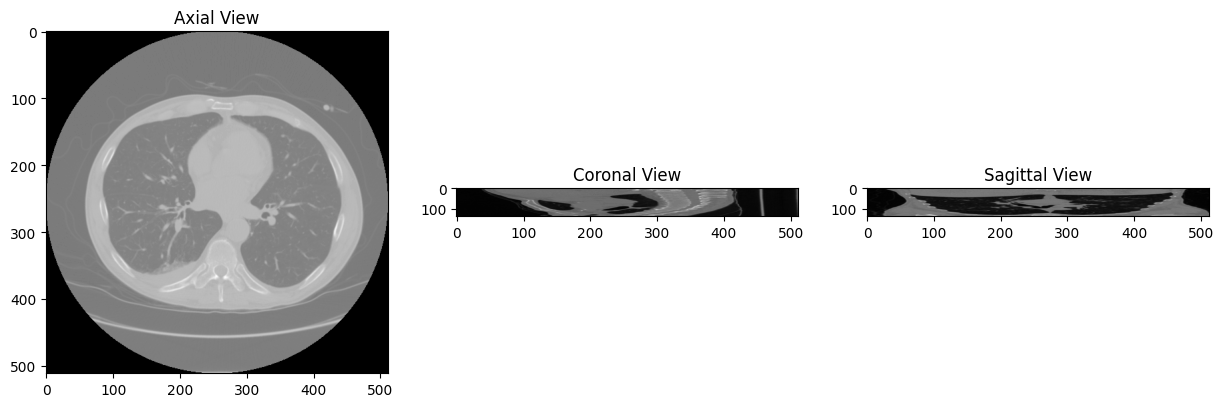

In [ ]:
# # similar to previous case, calculate axial, coronal and saggital aspect ratios
# ax_aspect =  # axial aspect 
# sag_aspect = # saggital aspect
# cor_aspect =  # coronal aspect

# # plot axial coronal and saggital slices of a middle slice 
# plt.figure(figsize=(15,15))
# a1 = plt.subplot(1,3,1)
# plt.title("Axial View")
# # obtain the middle axial slice from img_3D variable and store it in axial_slice
# axial_slice = 
# plt.imshow(axial_slice, cmap="gray")
# a1.set_aspect(ax_aspect)


# a2 = plt.subplot(1,3,2)
# plt.title("Coronal View")
# # obtain the middle coronal slice from img_3D variable and store it in coronal_slice (Hint: use transpose after slicing)
# coronal_slice = 
# plt.imshow(coronal_slice, cmap="gray")
# a2.set_aspect(cor_aspect)

# a3 = plt.subplot(1,3,3)
# plt.title("Sagittal View")
# # obtain the middle sagittal slice from img_3D variable and store it in sagittal_slice 
# sagittal_slice = 
# plt.imshow(sagittal_slice, cmap="gray")
# a3.set_aspect(sag_aspect)

# plt.show()

# Calculate aspect ratios
ax_aspect = PixelSpacing[1] / PixelSpacing[0]
sag_aspect = PixelSpacing[1] / SliceThickness
cor_aspect = PixelSpacing[0] / SliceThickness

# Plot axial, coronal, and sagittal views
plt.figure(figsize=(15, 15))

a1 = plt.subplot(1, 3, 1)
plt.title("Axial View")
axial_slice = img_3D[:, :, img_3D.shape[2] // 2]
plt.imshow(axial_slice, cmap="gray")
a1.set_aspect(ax_aspect)

a2 = plt.subplot(1, 3, 2)
plt.title("Coronal View")
coronal_slice = img_3D[:, img_3D.shape[1] // 2, :].transpose()
plt.imshow(coronal_slice, cmap="gray")
a2.set_aspect(cor_aspect)

a3 = plt.subplot(1, 3, 3)
plt.title("Sagittal View")
sagittal_slice = img_3D[img_3D.shape[0] // 2, :, :].transpose()
plt.imshow(sagittal_slice, cmap="gray")
a3.set_aspect(sag_aspect)

plt.show()


### What view does each of the following correspond to? (i.e., side view or back view, etc.)
 #### Ans.
### Which part of the body is visible in the above (eg: legs, arms, chest?)
 #### Ans.
### Have these images been windowed?
 #### Ans.

 - Answer the above questions. Compare the three views you obtained with the images in the results folder inside data. (double click to edit.) 

## CT Reconstruction

In [ ]:
import numpy as np

from scipy.interpolate import interp1d, griddata
from scipy.constants import golden_ratio
from scipy.fft import fft, ifft, fftfreq, fftshift, fft2, ifft2
from warnings import warn
from functools import partial

from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy

from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# def simple_backprojection(radon_transform, theta=None, output_size=256 ):
    # radon_transform: pass as input, the radon transform of the desired image, it has the shape (number of detectors, number of projections)
    # theta: Number of projections taken while obtaining the radon transform, for instance, if 984 projections are taken while covering an angle from 0 to 2pi, theta will be: np.linspace(0, 360, 984, endpoint=False)

    def simple_backprojection(radon_transform, theta=None, output_size=256):
      if theta is None:
        theta = np.linspace(0, 180, radon_transform.shape[1], endpoint=False)

      angles_count = radon_transform.shape[1]
      interpolation = 'linear'

      radon_transform = radon_transform.astype(np.float32)

      img_shape = radon_transform.shape[0]

      if output_size is None:
          output_size = int(np.floor(np.sqrt((img_shape) ** 2 / 2.0)))

      reconstructed = np.zeros((output_size, output_size), dtype=radon_transform.dtype)

      radius = output_size // 2
      xpr, ypr = np.mgrid[:output_size, :output_size] - radius
      x = np.arange(img_shape) - img_shape // 2

      for i in range(angles_count):
          projection = radon_transform[:, i]
          projection_grid = scipy.interpolate.griddata((x, theta), projection, (xpr, ypr), method=interpolation, fill_value=0)
          reconstructed += projection_grid

      return reconstructed * np.pi / (2 * angles_count)

    # if theta is None:
    #     theta = np.linspace(0, 180, radon_transform.shape[1], endpoint=False)

    # # store number of projections in the variable: angles_count
    # # HERE    

    # interpolation = 'linear'

    # # convert radon_image to np.float32
    # # HERE    


    # #######################################################
    # dtype = radon_transform.dtype

    # img_shape = radon_transform.shape[0]


    # if output_size is None:
    #     # If output size not specified, estimate from input radon image
    #     output_size = int(np.floor(np.sqrt((img_shape) ** 2 / 2.0)))
    # #######################################################



    # # Reconstruct image by interpolation
    # # create a variable reconstructed of size output_size x output_size with the same dtype as the radon_transform and initialize all values in it to zero
    # # HERE    

    # ##### Here we create a grid, your job is to backproject the radon transform on this grid #####
    # radius = output_size // 2
    # xpr, ypr = np.mgrid[:output_size, :output_size] - radius
    # x = np.arange(img_shape) - img_shape // 2

    # ### Backprojection ###
    # # each column in the radon transform represents a projection along a given angle theta
    # # the number of rays in each such projection is equal to the number of dectors (first dimension of radon_transform) 
    # # for each projection, you have the ray sum along each detector -> 1 point in the radon transform, 
    # # you have to backproject this point on a cartesian grid so we can see the reconstructed image

    # # the grid has been made for you, it is stored in the variables xpr and ypr  
    # # representing the x and y coordinates of each point in the grid

    # # iterate over each column in the radon transform and backproject it on the grid
    # # use interpolation to obtain values corresponding to EXACT points on the grid

    # # After obtaining the interpolated points, simply add them to the reconstructed variable created earlier

    # return reconstructed * np.pi / (2 * angles_count)

## load the input and store in a variable named inp
## load the input and store in a variable named inp
inp = cv2.imread("input_image.png", cv2.IMREAD_GRAYSCALE)

## load the radon transform of the input and store in a variable named radon_transform
radon_transform = np.load("radon_transform.npy")

# call the function simple_backprojection with the appropriate parameters and store the output in a variable named out
out = simple_backprojection(radon_transform)


#### This is just for visualization and scoring, you don't have to do anything here ####
# normalize both
inp = inp.astype(np.float32)
inp = (inp - inp.min()) / (inp.max() - inp.min())
out = (out - out.min()) / (out.max() - out.min())

plt.imshow(out, cmap='gray')
plt.show()
print(f"MSE: {mean_squared_error(inp, out)}")
print(f"PSNR: {peak_signal_noise_ratio(inp, out)}")

IndentationError: ignored